In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('age_predictions_cleaned.csv')

In [ ]:
data.head()

,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
0,2.0,1.393867,110.0,150.0,14.91,0
1,2.0,1.099498,89.0,80.0,3.85,0
2,2.0,0.629968,89.0,68.0,6.14,0
3,2.0,0.292901,104.0,84.0,16.15,0
4,1.0,1.426249,103.0,81.0,10.92,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(3524, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PAQ605     3524 non-null   float64
 1   BMXBMI     3524 non-null   float64
 2   LBXGLU     3524 non-null   float64
 3   LBXGLT     3524 non-null   float64
 4   LBXIN      3524 non-null   float64
 5   age_group  3524 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.3 KB


In [ ]:
data.describe()

,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,1.860085,0.717786,98.952530,116.379011,9.882826,0.500000
std,0.332242,0.569344,10.174653,35.284517,6.259255,0.500071
min,1.000000,0.001468,63.000000,40.000000,0.140000,0.000000
25%,2.000000,0.297993,92.000000,92.000000,5.340404,0.000000
50%,2.000000,0.591333,98.000000,110.000000,8.220000,0.500000
75%,2.000000,0.979190,104.046062,137.088293,12.771938,1.000000
max,2.000000,3.595801,142.000000,221.000000,38.430000,1.000000


In [ ]:
data.isnull().sum()

,0
PAQ605,0
BMXBMI,0
LBXGLU,0
LBXGLT,0
LBXIN,0
age_group,0


In [ ]:
data['age_group'].value_counts()

,count
age_group,
0,1762
1,1762


In [ ]:
result = pd.crosstab(data['age_group'], data['PAQ605'])
print(result)

PAQ605     1.000000  1.000238  1.003664  1.004520  1.007585  1.014667  \
age_group                                                               
0               346         0         0         0         0         0   
1                39         1         1         1         1         1   

PAQ605     1.017862  1.027420  1.044176  1.045967  ...  1.970606  1.974165  \
age_group                                          ...                       
0                 0         0         0         0  ...         0         0   
1                 1         1         1         1  ...         1         1   

PAQ605     1.976725  1.979974  1.980577  1.981572  1.982312  1.982620  \
age_group                                                               
0                 0         0         0         0         0         0   
1                 1         1         1         1         1         1   

PAQ605     1.987285  2.000000  
age_group                      
0                 0      1416  
1    

<Axes: xlabel='age_group', ylabel='count'>

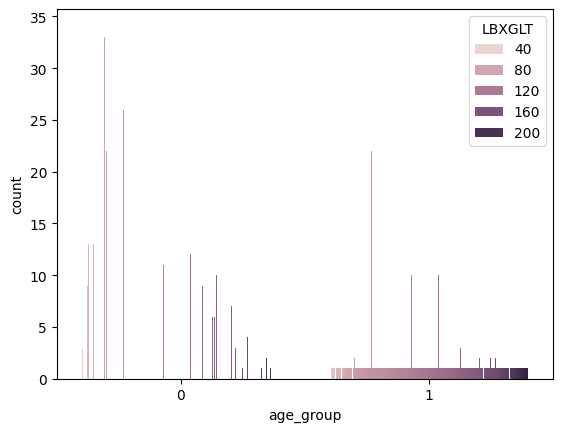

In [ ]:
sns.countplot(x="age_group", hue="LBXGLT", data=data)

In [ ]:
# shuffle data
data = data.sample(frac=1)
data = data.reset_index(drop=True)  # reet index after shuffling

In [ ]:
data.head()

,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
0,2.000000,1.426249,106.000000,104.000000,25.950000,0
1,1.178487,0.208426,116.821513,164.892435,15.706926,1
2,2.000000,2.527215,125.000000,147.000000,29.610000,0
3,2.000000,0.214988,99.783676,94.567352,12.003842,1
4,1.000000,0.354727,95.000000,95.000000,6.890000,0


In [ ]:
X = data.drop('age_group', axis=1) # use all columns except 'target' as features
Y = data['age_group']

In [ ]:
X.shape, Y.shape

((3524, 5), (3524,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 75, 100, 150],         # Focus on fewer trees due to dataset size
    'max_depth': [3, 5, 7, 10, 50],         # Explore shallow and fully grown trees
    'max_features': ['sqrt', 'log2'],     # Use subsets of features for splits
    'min_samples_split': [2, 5, 10]       # Control node splits
}

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

In [ ]:
# Perform Grid Search
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 100, 150]},
             scoring='accuracy', verbose=1)

In [ ]:
# Extract results
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
# Select relevant columns for meta-dataset
meta_dataset = results[['param_n_estimators', 'param_max_depth', 'param_max_features', 'param_min_samples_split',
                        'mean_test_score']]

In [ ]:
# Rename columns for clarity
meta_dataset.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_max_features': 'max_features',
    'param_min_samples_split': 'min_samples_split',
    'mean_test_score': 'accuracy'
}, inplace=True)

<ipython-input-18-584a53431e15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset.rename(columns={


In [ ]:
# Add meta-features of the dataset
meta_features = {
    'num_features': X.shape[1],
    'num_samples': X.shape[0],
    'class_imbalance_ratio': Y.value_counts().max() / Y.value_counts().min(),
    'num_classes': len(Y.unique())
}

In [ ]:
for feature, value in meta_features.items():
    meta_dataset[feature] = value

<ipython-input-20-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-20-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-20-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [ ]:
# Display the meta-dataset
print(meta_dataset.head())

   n_estimators  max_depth max_features  min_samples_split  accuracy  \
0            50          3         sqrt                  2  0.713301   
1            75          3         sqrt                  2  0.707624   
2           100          3         sqrt                  2  0.710868   
3           150          3         sqrt                  2  0.710462   
4            50          3         sqrt                  5  0.714923   

   num_features  num_samples  class_imbalance_ratio  num_classes  
0             5         3524                    1.0            2  
1             5         3524                    1.0            2  
2             5         3524                    1.0            2  
3             5         3524                    1.0            2  
4             5         3524                    1.0            2  


In [ ]:
# Save the meta-dataset to a CSV file for later use
meta_dataset.to_csv('meta_dataset_age.csv', index=False)